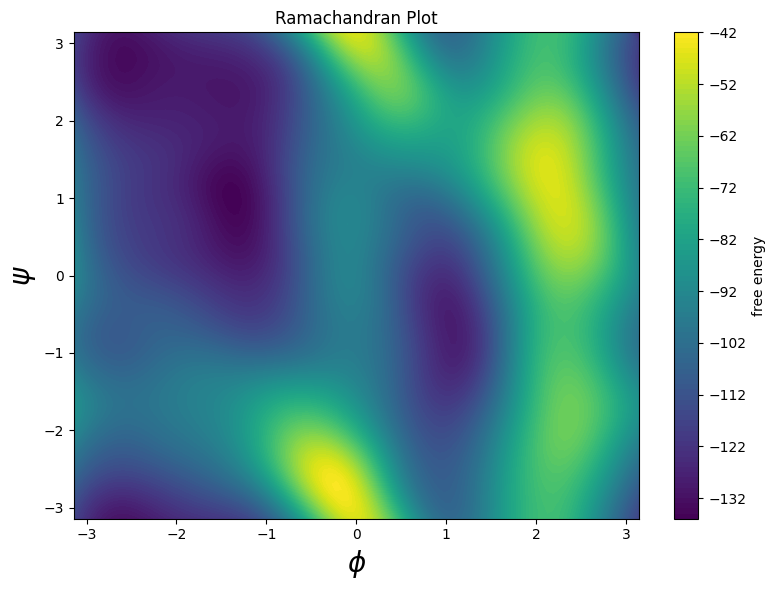

In [3]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

date = "0120114606"
seed = 0
# 데이터 파일 경로
file_path = f'/home/guest_sky/enhance/simulations/aldp/ref/log/{date}/{seed}/fes/100.dat'

# 데이터 읽기
data = np.loadtxt(file_path, comments='#')

# phi, psi, free_energy 값 추출
phi = data[:, 0]
psi = data[:, 1]
z = data[:, 2]

# 주기성을 고려하여 경계값 추가
phi = np.concatenate([phi, phi, phi + 2 * np.pi, psi + 2 * np.pi])
psi = np.concatenate([psi, psi + 2 * np.pi, psi, psi + 2 * np.pi])
z = np.concatenate([z, z, z, z])

# 그리드 데이터 생성
phi_lin = np.linspace(-np.pi, np.pi, 100)
psi_lin = np.linspace(-np.pi, np.pi, 100)
phi_grid, psi_grid = np.meshgrid(phi_lin, psi_lin)
z_grid = griddata((phi, psi), z, (phi_grid, psi_grid), method='cubic')

# Ramachandran plot 생성
plt.figure(figsize=(8, 6))
contour = plt.contourf(phi_grid, psi_grid, z_grid, levels=100, cmap='viridis')
plt.colorbar(contour, label='free energy')
plt.title('Ramachandran Plot')
plt.xlabel(r'$\phi$', fontsize=20, fontweight="medium")
plt.ylabel(r'$\psi$', fontsize=20, fontweight="medium")
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.tight_layout()
plt.savefig('../figures/ramachandran.png', dpi=300, bbox_inches="tight")
plt.savefig('../figures/ramachandran.pdf', dpi=300, bbox_inches="tight")
plt.show()